In [1]:
# import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# generate arrays of random latitude and longitude values
lat = np.random.uniform(-90.000,90.000, size=1500)
lngs = np.random.uniform(-180.000,180.000, size=1500)
lat_lngs = zip(lat, lngs)
lat_lngs

In [3]:
# add the latitudes and longitudes to a list. 
coordinates = list(lat_lngs)

In [4]:
# create a list for holding the cities
cities = []
# Identify the nearest city for each latitude and logitude combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list. 
    if city not in cities:
        cities.append(city)
# print the city count to confirm sufficient count:
len(cities)

619

In [5]:
# Pseudocode for getting the city data from these random cities

# 1. import our dependencies, initialize counters and an empty list that will hold the weather data.
# 2. loop through the cities list
# 3. Group the cities in sets of 50 to log the process as we find the weather data for each city.
# 3.1 two counters will be needed here:one to log the city count from 1 to 50 and another for the sets
# 4. Build the city_url or end point for each city
# 5. log the URL and the record and set numbers
# 6. make an API request for each city
# 7. Parse the JSON data for the following:
#     City, country, and date
#     lat and long
#     max temp
#     humitidty
#     cloudiness
#     wind speed
# 8. Add the data to a list in a dictionary format and then convert the list to a DF

In [6]:
# import requests and api_key
import requests
from config import weather_api_key

In [7]:
# starting URL for weather map API call:
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&lat={lat}&lon={lon}&appid=" + weather_api_key

In [8]:
# import the time lib and the datetime module 
import time
from datetime import datetime

In [9]:
# create an empty list to hold the weather data
city_data = []
# print the beggining of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# create counters
record_count = 1
set_count = 1

# loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i>= 50):
        set_count += 1
        record_count = 1
        # pause the api for 60 seconds
        time.sleep(60)
        
    # create endpoint url with each city, while removing spaces in the city name
    city_url = url + "&q=" + city.replace(" ","+")
    
    # log the url, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count
    record_count += 1
    
    # run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        #parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")

    # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})

    #If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that data loading is complete.
print("------------------------")
print("Data Retrieval Complete ")
print("------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | lasa
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | nanortalik
Processing Record 5 of Set 1 | hithadhoo
Processing Record 6 of Set 1 | koutiala
Processing Record 7 of Set 1 | jamestown
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | abyek
Processing Record 10 of Set 1 | college
Processing Record 11 of Set 1 | lagunas
Processing Record 12 of Set 1 | port elizabeth
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | lebu
Processing Record 15 of Set 1 | kholmogory
Processing Record 16 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 17 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 18 of Set 1 | dothan
Processing Record 19 of Set 1 | slave lake
Processing Record 20 of Set 1 | hobart
Processing Record 21 of Set 1 | kinango
Processing Record 22 of 

Processing Record 37 of Set 4 | vasterhaninge
Processing Record 38 of Set 4 | batagay-alyta
Processing Record 39 of Set 4 | superior
Processing Record 40 of Set 4 | beira
Processing Record 41 of Set 4 | mangrol
Processing Record 42 of Set 4 | gornyy
Processing Record 43 of Set 4 | linxia
Processing Record 44 of Set 4 | makakilo city
Processing Record 45 of Set 4 | sesheke
Processing Record 46 of Set 4 | vanimo
Processing Record 47 of Set 4 | beaune
Processing Record 48 of Set 4 | coronado
Processing Record 49 of Set 4 | kavaratti
Processing Record 50 of Set 4 | baoshan
Processing Record 1 of Set 5 | mukono
Processing Record 2 of Set 5 | tiksi
Processing Record 3 of Set 5 | lata
Processing Record 4 of Set 5 | suez
Processing Record 5 of Set 5 | kalikapur
Processing Record 6 of Set 5 | sukumo
Processing Record 7 of Set 5 | atherton
Processing Record 8 of Set 5 | diamantina
Processing Record 9 of Set 5 | muroto
Processing Record 10 of Set 5 | whitianga
Processing Record 11 of Set 5 | epe


Processing Record 31 of Set 8 | erzin
Processing Record 32 of Set 8 | santa vitoria do palmar
Processing Record 33 of Set 8 | nantucket
Processing Record 34 of Set 8 | storsteinnes
Processing Record 35 of Set 8 | provideniya
Processing Record 36 of Set 8 | hathras
Processing Record 37 of Set 8 | karratha
Processing Record 38 of Set 8 | ozgon
City not found. Skipping...
Processing Record 39 of Set 8 | murillo
Processing Record 40 of Set 8 | thunder bay
Processing Record 41 of Set 8 | kenora
Processing Record 42 of Set 8 | port hardy
Processing Record 43 of Set 8 | camana
Processing Record 44 of Set 8 | sabha
Processing Record 45 of Set 8 | tawkar
City not found. Skipping...
Processing Record 46 of Set 8 | roald
Processing Record 47 of Set 8 | guanica
Processing Record 48 of Set 8 | vila do maio
Processing Record 49 of Set 8 | tazovskiy
Processing Record 50 of Set 8 | kutum
Processing Record 1 of Set 9 | tall kayf
Processing Record 2 of Set 9 | dingle
Processing Record 3 of Set 9 | bhadr

Processing Record 16 of Set 12 | yuli
Processing Record 17 of Set 12 | khujner
Processing Record 18 of Set 12 | cheuskiny
City not found. Skipping...
Processing Record 19 of Set 12 | piriyapatna
Processing Record 20 of Set 12 | geylegphug
City not found. Skipping...
Processing Record 21 of Set 12 | vangaindrano
Processing Record 22 of Set 12 | mariinsk
Processing Record 23 of Set 12 | lagos
Processing Record 24 of Set 12 | vila velha
Processing Record 25 of Set 12 | dubna
Processing Record 26 of Set 12 | sangamner
Processing Record 27 of Set 12 | pundaguitan
Processing Record 28 of Set 12 | shache
Processing Record 29 of Set 12 | boende
Processing Record 30 of Set 12 | togur
Processing Record 31 of Set 12 | grindavik
Processing Record 32 of Set 12 | yacuiba
Processing Record 33 of Set 12 | general pico
Processing Record 34 of Set 12 | foshan
Processing Record 35 of Set 12 | harper
Processing Record 36 of Set 12 | inhambane
Processing Record 37 of Set 12 | xicotencatl
Processing Record 

In [10]:
# count the number of cities collected
print(len(city_data))

566


In [11]:
# convert the array of dictionaries into a pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,80.42,80,68,14.16,KI,2022-04-16 19:27:02
1,Lasa,46.6166,10.7002,49.08,91,26,7.52,IT,2022-04-16 19:27:03
2,Georgetown,5.4112,100.3354,82.33,92,20,4.61,MY,2022-04-16 19:22:33
3,Nanortalik,60.1432,-45.2371,31.41,80,8,11.01,GL,2022-04-16 19:27:03
4,Hithadhoo,-0.6000,73.0833,83.21,67,100,5.28,MV,2022-04-16 19:27:04


In [12]:
# reorder the df columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2022-04-16 19:27:02,3.0707,172.7902,80.42,80,68,14.16
1,Lasa,IT,2022-04-16 19:27:03,46.6166,10.7002,49.08,91,26,7.52
2,Georgetown,MY,2022-04-16 19:22:33,5.4112,100.3354,82.33,92,20,4.61
3,Nanortalik,GL,2022-04-16 19:27:03,60.1432,-45.2371,31.41,80,8,11.01
4,Hithadhoo,MV,2022-04-16 19:27:04,-0.6000,73.0833,83.21,67,100,5.28


In [13]:
# create the output file csv
output_data_file = "weather_data/cities.csv"
# Export the city_Data to a csv
city_data_df.to_csv(output_data_file, index_label="City ID")

In [14]:
# extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

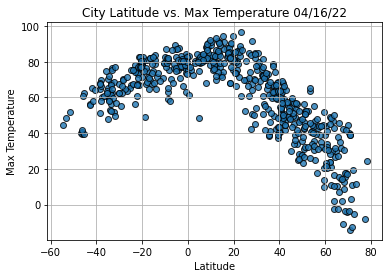

In [15]:
# import the time module
import time

# Build the scatter plot for the latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# incorporate the other graph properities
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig1.png")

#show plot
plt.show()

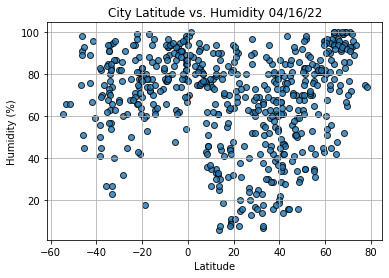

In [16]:
# Build the scatter plot for the latitude vs. humidity
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# incorporate the other graph properities
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig2.png")

#show plot
plt.show()

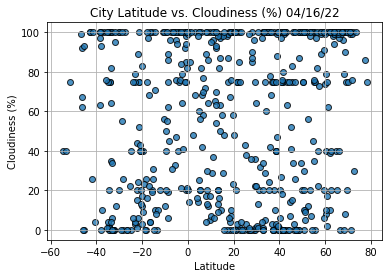

In [17]:
# Build the scatter plot for the latitude vs. cloudiness
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# incorporate the other graph properities
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig3.png")

#show plot
plt.show()

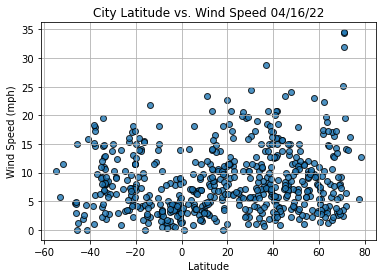

In [18]:
# Build the scatter plot for the latitude vs. Wind speed
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# incorporate the other graph properities
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure
plt.savefig("weather_data/Fig4.png")

#show plot
plt.show()

In [19]:
# import linregress
from scipy.stats import linregress

# create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # run regression on hemisphere weather data
    (slope, intercept, r_valule, p_value, std_err) = linregress(x_values,y_values)
    
    # calculate the regression line "7 values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                         Lebu
Country                        CL
Date          2022-04-16 19:27:07
Lat                      -37.6167
Lng                        -73.65
Max Temp                    59.95
Humidity                       70
Cloudiness                     10
Wind Speed                  14.58
Name: 13, dtype: object

In [21]:
# Create Northern and Southern Hemisphere Data
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

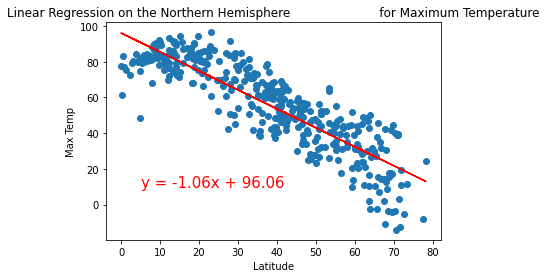

In [30]:
# linear regression on the Northern Hemisphere for Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for Maximum Temperature', 'Max Temp', (5,10))

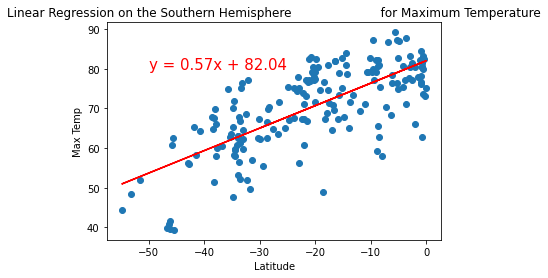

In [23]:
# linear regression on the Southern Hemisphere for Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for Maximum Temperature', 'Max Temp', (-50,80))

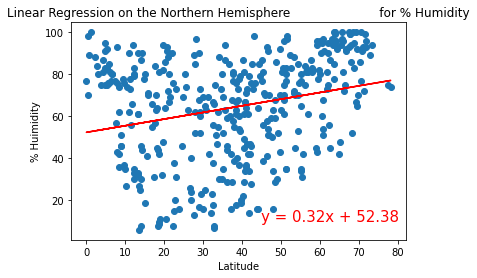

In [24]:
# linear regression on the Northern Hemisphere for % Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for % Humidity', '% Huimidity', (45,10))

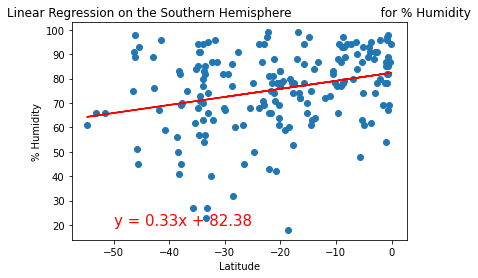

In [25]:
# linear regression on the Southern Hemisphere for % humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for % Humidity', '% Humidity', (-50,20))

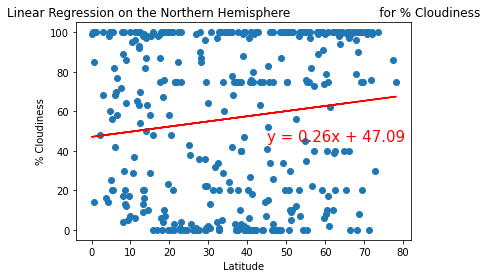

In [32]:
# linear regression on the Northern Hemisphere for % cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for % Cloudiness', '% Cloudiness', (45,45))

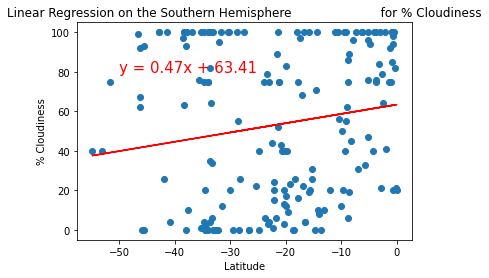

In [33]:
# linear regression on the Southern Hemisphere for % cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for % Cloudiness', '% Cloudiness', (-50,80))

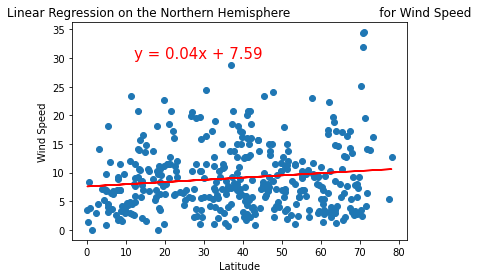

In [34]:
# linear regression on the Northern Hemisphere for Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for Wind Speed', 'Wind Speed', (12,30))

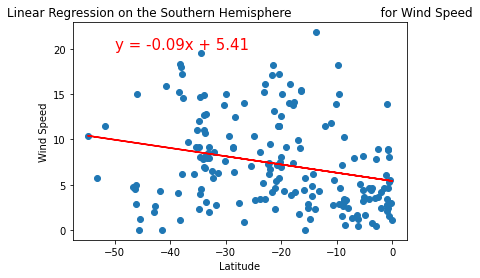

In [35]:
# linear regression on the Southern Hemisphere for Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for Wind Speed', 'Wind Speed', (-50,20))